In [1]:
#Let's import the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data:- 

In [3]:
# let's import data and giving all the column header  names to the raw data
dataset=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income'])
dataset.head()# read the first five rows of data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

##### Here are the columns name which give us some information of this data.
age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country all are independent feature and  CensusIncome is dependent feature.

In [6]:
dataset.shape

(32561, 15)

In [7]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

This is a mix datatype of integer and object

In [8]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

There are no null values, but there are question mark sign '?' present inside  this data so, we have to figure out, how many question mark are there?

workclass, occupation, native-country :- columns have question mark. We have to solve this later.

In [9]:
dataset.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
dataset.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64

Here we see all the columns have different unique values

In [11]:
# some statistical information
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


 Here we see 

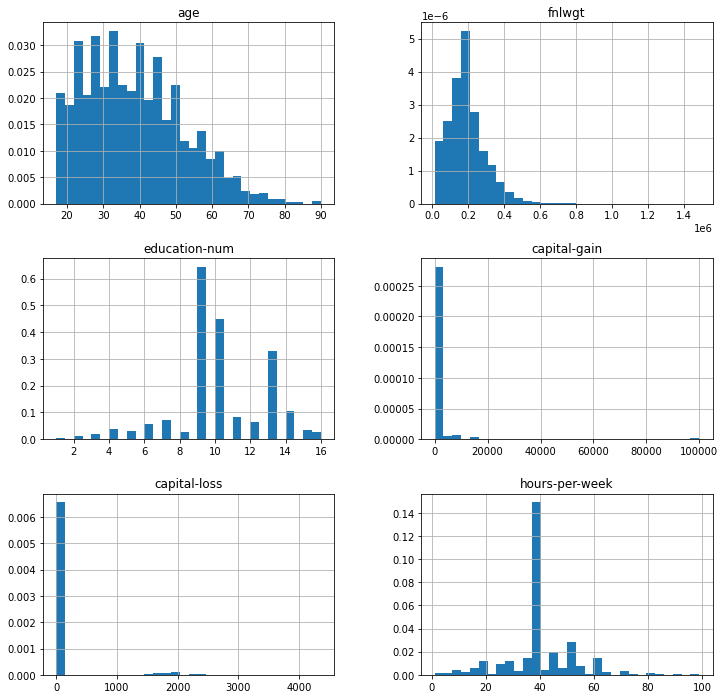

In [12]:
# Visualize the variable distribution with histograms:
dataset.hist(bins=30, figsize=(12,12), density=True)
plt.show()

In [14]:
# Find  the question mark sign '?'

In [15]:
dataset["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

There are 1836 numbers of question mark sign in the workclass column

In [17]:
dataset["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

There are 1843 numbers of question mark sign in the occupation column

In [18]:
dataset["native-country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There are 583 numbers of question mark sign in the native-country column

In [19]:
dataset["marital-status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [20]:
dataset["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

male are more than female

In [21]:
dataset["Income"].value_counts()# this is target variable

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [22]:
# assign  question mark  to new values
## replacing with mode

In [23]:
dataset["workclass"].mode()

0     Private
Name: workclass, dtype: object

In [24]:
dataset["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [25]:
dataset["occupation"].mode()

0     Prof-specialty
Name: occupation, dtype: object

In [26]:
dataset["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [27]:
dataset["native-country"].mode()

0     United-States
Name: native-country, dtype: object

In [28]:
dataset["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [29]:
dataset["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [30]:
dataset["workclass"].replace({' ?':" Private"},inplace=True)
dataset["occupation"].replace({' ?':" Prof-specialty"},inplace=True)
dataset["native-country"].replace({' ?':" United-States"},inplace=True)

In [31]:
dataset["workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [32]:
dataset["occupation"].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
dataset["native-country"].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [34]:
dataset.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [35]:
dataset["workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [36]:
new_data=dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
# new  dataframe is created.
#here we strip all the categorical columns value,here we have only one categorical column(Classes).

In [37]:
dataset["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [38]:
new_data["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [39]:
#Chacking headers names

for i in new_data.columns:
    print(i,len(i),end=" ")

age 3 workclass 9 fnlwgt 6 education 9 education-num 13 marital-status 14 occupation 10 relationship 12 race 4 sex 3 capital-gain 12 capital-loss 12 hours-per-week 14 native-country 14 Income 6 

In [40]:
for i in new_data.columns:
    a=i.strip().upper()
    print(len(a),end=" ")
    new_data.rename(columns={i: a},inplace= True)

3 9 6 9 13 14 10 12 4 3 12 12 14 14 6 

In [41]:
new_data.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION-NUM',
       'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK', 'NATIVE-COUNTRY',
       'INCOME'],
      dtype='object')

In these above cells we change format of  all headers and if there is any  Extra speces  that are removed from all columns

New dataframe(new_data) columns are here 

In [42]:
new_data

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Checking distribution of data

In [44]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPITAL-GAIN    32561 non-null  int64 
 11  CAPITAL-LOSS    32561 non-null  int64 
 12  HOURS-PER-WEEK  32561 non-null  int64 
 13  NATIVE-COUNTRY  32561 non-null  object
 14  INCOME          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
# correlation of numeric data
new_data.corr()

,AGE,FNLWGT,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK
AGE,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
FNLWGT,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
EDUCATION-NUM,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
CAPITAL-GAIN,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
CAPITAL-LOSS,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
HOURS-PER-WEEK,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In INCOME there is no high positive correlation

<AxesSubplot:>

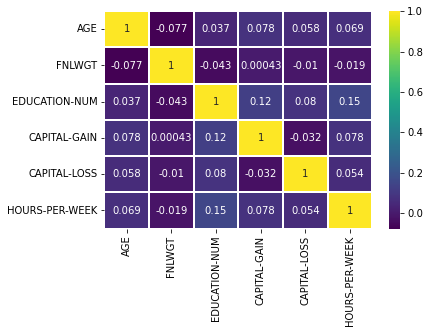

In [46]:
#Heatmap
#Using correlation heatmap to see the relashionship between variables.
sns.heatmap(new_data.corr(),annot=True,cmap='viridis',linewidths=.12)

All the variables are little correlate

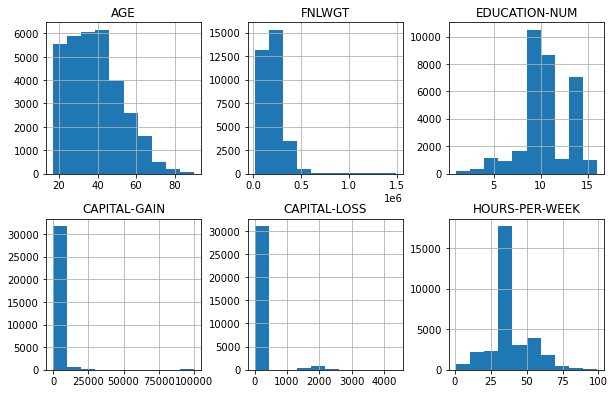

In [47]:
new_data.hist(figsize=(10,10),layout=(3,3),sharex=False);

All six neumric columns have  outliers, here incoum is our target variable

<AxesSubplot:xlabel='AGE', ylabel='Density'>

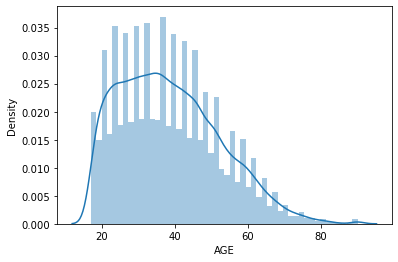

In [48]:
sns.distplot(new_data["AGE"])

age  is  skewed so outliers are present in this

Checking for outliers

<AxesSubplot:>

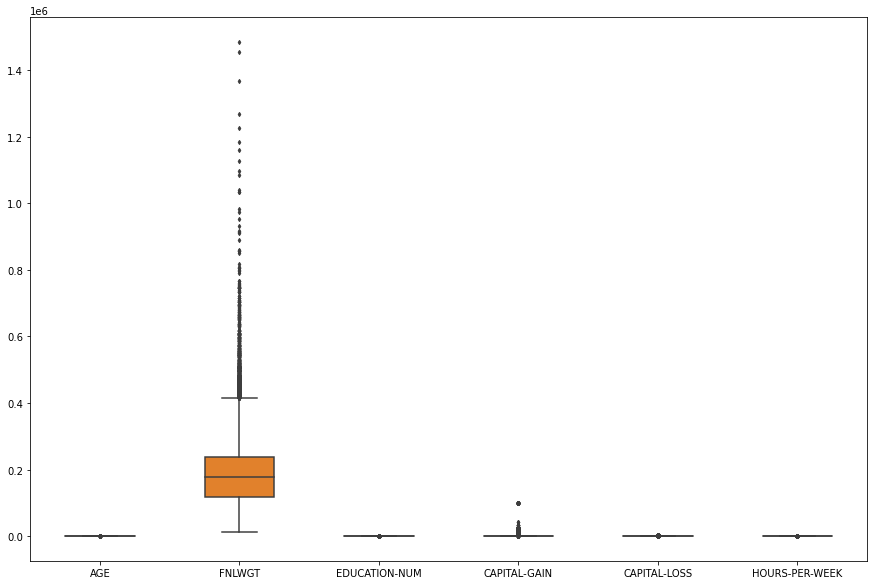

In [49]:
fig ,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=new_data ,width=0.5 ,ax = ax , fliersize =3)

we have outliers on some collumns. But in 'FNLWGT' have huge outliers 

# Copying Data 

In [50]:
data_updated=new_data.copy()

# Building Model

In [51]:
X= new_data.drop(["INCOME"],axis=1)# Dropping Dependent variable
y= new_data["INCOME"]# Dependent data

In [52]:
X

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [53]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: INCOME, Length: 32561, dtype: object

# Feature Scaling

In [54]:
##Let's import the necessary Python libraries
from sklearn.preprocessing import StandardScaler ,LabelEncoder

In [55]:
data_updated= data_updated.apply(LabelEncoder().fit_transform)
data_updated.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,INCOME
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,0


In [74]:
sdscaler = StandardScaler().fit(data_updated.drop("INCOME",axis=1))

In [78]:
X= sdscaler.transform(data_updated.drop("INCOME",axis=1))
y= data_updated["INCOME"]

In [79]:
X # scaled X data

array([[ 0.0307785 ,  2.62429763, -1.29410611, ..., -0.20417671,
        -0.03112174,  0.26136999],
       [ 0.83750854,  1.72109965, -1.25194955, ..., -0.20417671,
        -2.25447498,  0.26136999],
       [-0.04256059, -0.08529633,  0.59302012, ..., -0.20417671,
        -0.03112174,  0.26136999],
       ...,
       [ 1.4242213 , -0.08529633, -0.43245899, ..., -0.20417671,
        -0.03112174,  0.26136999],
       [-1.21598611, -0.08529633,  0.39380969, ..., -0.20417671,
        -1.67805007,  0.26136999],
       [ 0.98418673,  0.81790166,  1.21115109, ..., -0.20417671,
        -0.03112174,  0.26136999]])

In [80]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: INCOME, Length: 32561, dtype: int32

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3 ,random_state=355)

## Model Training

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt

In [83]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_prediction = log_reg.predict(X_test)


print("Accuracy on tranning data: {:,.3f}".format(log_reg.score(X_train,y_train)))
print("Accuracy on test data: {:,.3f}".format(log_reg.score(X_test,y_test)))

Accuracy on tranning data: 0.823
Accuracy on test data: 0.825


In [89]:
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
accuracy= accuracy_score(y_test,y_prediction)
accuracy

0.8250588596581021

In [92]:
#confusion matrix
con_mat = confusion_matrix(y_test,y_prediction)
con_mat

array([[6963,  450],
       [1259, 1097]], dtype=int64)

Accourding on (y_test,y_prediction) ,I get  accuracy 0.8250588596581021 around 82% and alse get confusion matrix


In [129]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7413
           1       0.71      0.47      0.56      2356

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.73      9769
weighted avg       0.81      0.83      0.81      9769



In [132]:
true_positive =con_mat[0][0]
false_positive =con_mat[0][1]
false_negative =con_mat[1][0]
true_negative =con_mat[1][1]

In [134]:
true_positive =con_mat[0][0]
true_positive 

6963

In [135]:
false_positive =con_mat[0][1]
false_positive

450

In [136]:
false_negative =con_mat[1][0]
false_negative

1259

In [137]:
true_negative =con_mat[1][1]
true_negative

1097

In [138]:
# Accuracy
Accuracy = (6963  +1259 )  / (6963+450+1259+1097)
Accuracy

0.8416419285494933

In [140]:
#PrecisionPrecision = true_positive /(true_positive +false_positive )
Precision = 6963 /(6963 +450 )
Precision

0.9392958316471064

93% 

In [141]:
#recall
Recall =true_positive /(true_positive +false_negative)
Recall

0.8468742398443201

84%

In [103]:
# F1 score
F1_score = 2* (Recall * Precision)/ (Recall + Precision)
F1_score

0.8906939558682443

Confusion matrix, precision, recall, and F1 score provides better insights into the prediction 

In [104]:
X_test

array([[-1.50934249, -0.08529633, -0.36814956, ..., -0.20417671,
        -1.10162515,  0.26136999],
       [-1.50934249, -0.08529633, -0.2444903 , ..., -0.20417671,
        -0.8545859 ,  0.26136999],
       [ 0.32413488, -0.08529633, -1.44024887, ..., -0.20417671,
        -0.03112174,  0.26136999],
       ...,
       [-1.50934249, -0.08529633,  0.52755346, ..., -0.20417671,
        -1.67805007,  0.26136999],
       [-0.55593426, -0.08529633,  1.6156888 , ..., -0.20417671,
        -0.03112174, -2.21553145],
       [ 0.32413488, -0.08529633,  1.25413426, ..., -0.20417671,
         0.38061034,  0.26136999]])

# LinearRegression

In [107]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression

LinearRegression()

In [108]:
regression.fit(X_train,y_train)

LinearRegression()

In [113]:
# show cocoefficients and the intercept
print(regression.coef_)

[ 0.0567354  -0.0118914   0.00560611 -0.01454154  0.11457673 -0.03245641
  0.00264817 -0.02330339  0.01202908  0.04781272  0.10900935  0.05751499
  0.04156731 -0.0036661 ]


In [110]:
reg_pred=regression.predict(X_test)


In [114]:
print(regression.intercept_)

0.24102838264714696


Prediction of the model

In [115]:
reg_pred

array([-0.00957029, -0.06000267,  0.25644179, ..., -0.11674399,
        0.08650805,  0.2598213 ])

Text(0, 0.5, 'Test Predicted Data')

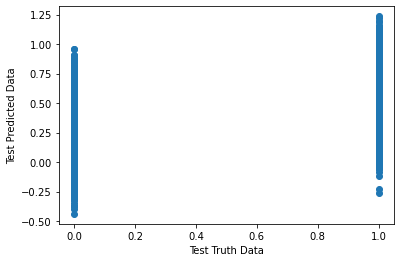

In [112]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

no lenier relation, model is not good


In [118]:
## residuals
residuals=y_test-reg_pred
residuals# printing Errors

8723     0.009570
7926     0.060003
3062    -0.256442
18357   -0.097614
25514   -0.236903
           ...   
17022    0.001882
17328   -0.076210
20204    0.116744
25696   -0.086508
9900     0.740179
Name: INCOME, Length: 9769, dtype: float64

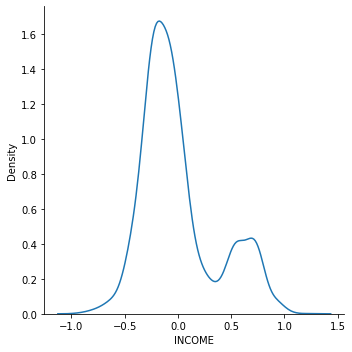

In [119]:
sns.displot(residuals,kind="kde")

normal distribution but skewed(bimodel)

In [120]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.12737921802901078
0.27707087229344074
0.3569022527653906


In [121]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.3039675116432512


In [122]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [123]:
ridge.fit(X_train,y_train)

Ridge()

In [128]:
(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6970315097671439

In [124]:
ridge.predict(X_test)

array([-0.00956998, -0.05999255,  0.25644608, ..., -0.11673397,
        0.08651177,  0.25982371])

In [1]:
# we have to use hyperparameter tuning